# Question 3: Customer Rating of Breakfast Cereals

## Data Preprocessing
- Remove cereals with missing values
- Normalize the data for further measurements

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Display all columns
pd.set_option('display.max_columns', None)

In [18]:
# Load the Cereals dataset from dmba library
from dmba import load_data

# Load Cereals data
cereals_df = load_data('Cereals.csv')

# Display basic information about the dataset
print("Dataset Shape:", cereals_df.shape)
print("\nFirst few rows:")
print(cereals_df.head())
print("\nDataset Info:")
print(cereals_df.info())
print("\nMissing Values:")
print(cereals_df.isnull().sum())

Dataset Shape: (77, 16)

First few rows:
                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100%_Bran   N    C        70        4    1     130   10.0   
1          100%_Natural_Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   
4             Almond_Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0     6.0   280.0        25      3     1.0  0.33  68.402973  
1    8.0     8.0   135.0         0      3     1.0  1.00  33.983679  
2    7.0     5.0   320.0        25      3     1.0  0.33  59.425505  
3    8.0     0.0   330.0        25      3     1.0  0.50  93.704912  
4   14.0     8.0     NaN        25      3     1.0  0.75  34.384843  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [19]:
# Step 1: Remove cereals with missing values
print("Before removing missing values:")
print(f"Number of cereals: {len(cereals_df)}")
print(f"Total missing values: {cereals_df.isnull().sum().sum()}")

# Remove rows with any missing values
cereals_clean = cereals_df.dropna()

print("\nAfter removing missing values:")
print(f"Number of cereals: {len(cereals_clean)}")
print(f"Total missing values: {cereals_clean.isnull().sum().sum()}")
print(f"Cereals removed: {len(cereals_df) - len(cereals_clean)}")

Before removing missing values:
Number of cereals: 77
Total missing values: 4

After removing missing values:
Number of cereals: 74
Total missing values: 0
Cereals removed: 3


In [20]:
# Step 2: Identify numerical columns for normalization
# Typically, we normalize numerical features and keep categorical columns as-is

print("Column names and types:")
print(cereals_clean.dtypes)
print("\nFirst few rows of cleaned data:")
print(cereals_clean.head())

Column names and types:
name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars      float64
potass      float64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

First few rows of cleaned data:
                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100%_Bran   N    C        70        4    1     130   10.0   
1          100%_Natural_Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   
5    Apple_Cinnamon_Cheerios   G    C       110        2    2     180    1.5   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0     6.0   280.0        25      3     1.0  0.33  68

In [21]:
# Step 3: Normalize the numerical data
# Separate numerical and non-numerical columns
numerical_cols = cereals_clean.select_dtypes(include=[np.number]).columns.tolist()
non_numerical_cols = cereals_clean.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"\nNon-numerical columns ({len(non_numerical_cols)}): {non_numerical_cols}")

# Create a copy for normalized data
cereals_normalized = cereals_clean.copy()

# Initialize StandardScaler for normalization (z-score normalization)
scaler = StandardScaler()

# Normalize only the numerical columns
if len(numerical_cols) > 0:
    cereals_normalized[numerical_cols] = scaler.fit_transform(cereals_clean[numerical_cols])
    
print("\nNormalization completed!")
print("\nOriginal data statistics (first few numerical columns):")
print(cereals_clean[numerical_cols[:5]].describe())
print("\nNormalized data statistics (first few numerical columns):")
print(cereals_normalized[numerical_cols[:5]].describe())

Numerical columns (13): ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating']

Non-numerical columns (3): ['name', 'mfr', 'type']

Normalization completed!

Original data statistics (first few numerical columns):
         calories    protein        fat      sodium      fiber
count   74.000000  74.000000  74.000000   74.000000  74.000000
mean   107.027027   2.513514   1.000000  162.364865   2.175676
std     19.843893   1.075802   1.006826   82.769787   2.423391
min     50.000000   1.000000   0.000000    0.000000   0.000000
25%    100.000000   2.000000   0.000000  135.000000   0.250000
50%    110.000000   2.500000   1.000000  180.000000   2.000000
75%    110.000000   3.000000   1.000000  217.500000   3.000000
max    160.000000   6.000000   5.000000  320.000000  14.000000

Normalized data statistics (first few numerical columns):
           calories       protein        fat        sodium         fiber
count  7.40000

In [22]:
# Display the final preprocessed data
print("Final preprocessed dataset:")
print(f"Shape: {cereals_normalized.shape}")
print("\nFirst 10 rows of normalized data:")
print(cereals_normalized.head(10))
print("\nSummary statistics of normalized data:")
print(cereals_normalized.describe())

Final preprocessed dataset:
Shape: (74, 16)

First 10 rows of normalized data:
                         name mfr type  calories   protein  fat    sodium  \
0                   100%_Bran   N    C -1.878652  1.391180  0.0 -0.393692   
1           100%_Natural_Bran   Q    C  0.658214  0.455295  4.0 -1.792572   
2                    All-Bran   K    C -1.878652  1.391180  0.0  1.187651   
3   All-Bran_with_Extra_Fiber   K    C -2.893399  1.391180 -1.0 -0.272050   
5     Apple_Cinnamon_Cheerios   G    C  0.150841 -0.480589  1.0  0.214517   
6                 Apple_Jacks   K    C  0.150841 -0.480589 -1.0 -0.454513   
7                     Basic_4   G    C  1.165587  0.455295  1.0  0.579442   
8                   Bran_Chex   R    C -0.863906 -0.480589  0.0  0.457800   
9                 Bran_Flakes   P    C -0.863906  0.455295 -1.0  0.579442   
10               Cap'n'Crunch   Q    C  0.658214 -1.416474  1.0  0.701084   

       fiber     carbo    sugars    potass  vitamins     shelf    weight 

## Part A: Hierarchical Clustering Analysis

### Objective
Apply hierarchical clustering using Euclidean distance with both single linkage and complete linkage methods. Compare dendrograms, cluster centroids, and evaluate cluster structure and stability.

In [23]:
# Import libraries for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Set up matplotlib for better visualizations
plt.style.use('default')
%matplotlib inline

In [24]:
# Prepare data for clustering: extract only numerical features (normalized)
X_normalized = cereals_normalized[numerical_cols].values

print(f"Data shape for clustering: {X_normalized.shape}")
print(f"Number of samples: {X_normalized.shape[0]}")
print(f"Number of features: {X_normalized.shape[1]}")

Data shape for clustering: (74, 13)
Number of samples: 74
Number of features: 13


## STEP A: Hierarchical Clustering

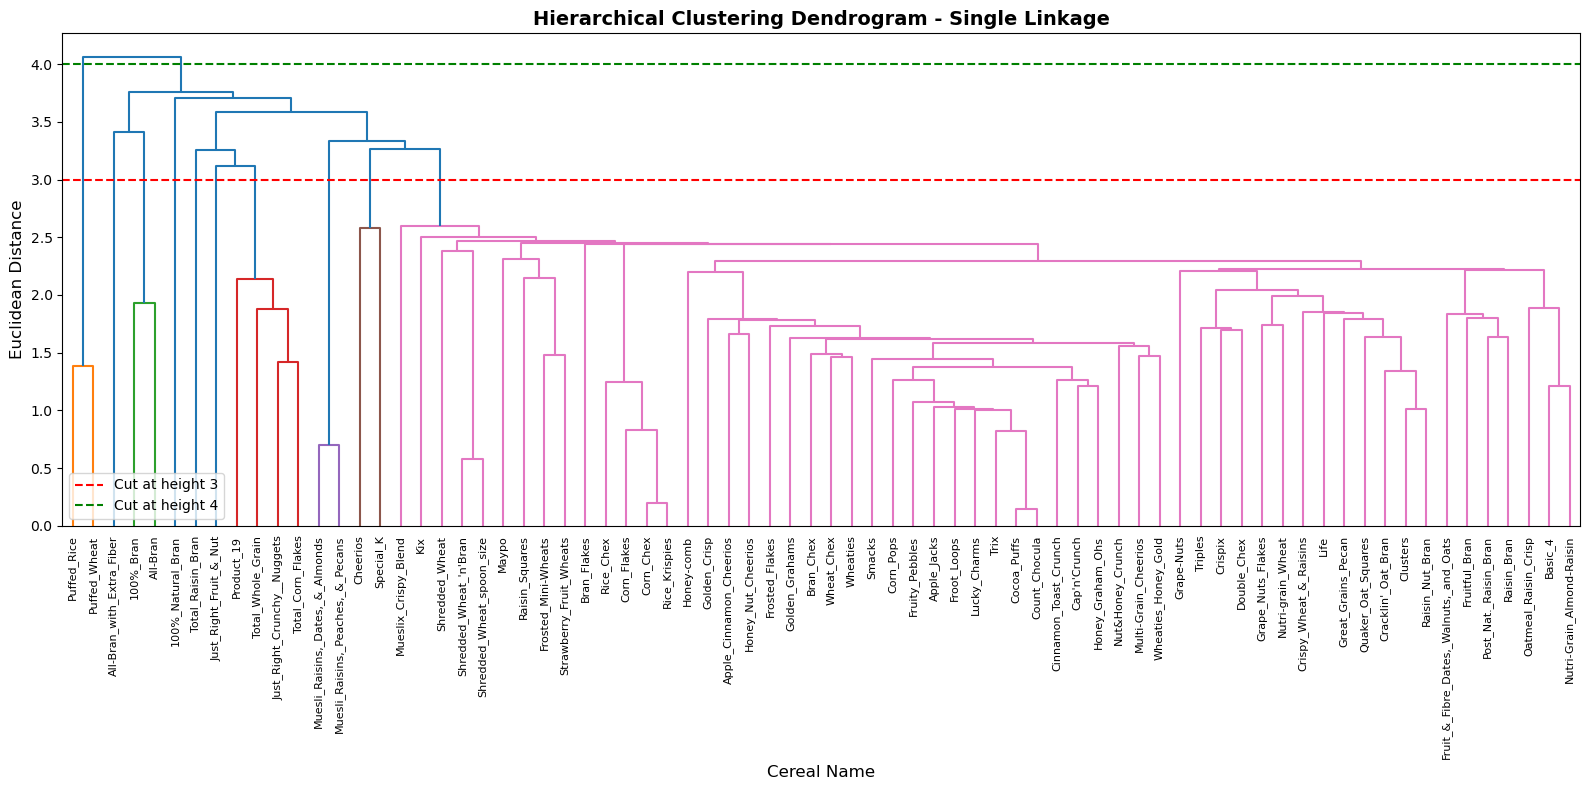

Single linkage clustering completed!


In [25]:
# Perform hierarchical clustering with SINGLE LINKAGE
linkage_single = linkage(X_normalized, method='single', metric='euclidean')

# Create dendrogram for single linkage
plt.figure(figsize=(16, 8))
plt.subplot(1, 1, 1)
dendrogram(linkage_single, 
           labels=cereals_normalized['name'].values,
           leaf_rotation=90,
           leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram - Single Linkage', fontsize=14, fontweight='bold')
plt.xlabel('Cereal Name', fontsize=12)
plt.ylabel('Euclidean Distance', fontsize=12)
plt.axhline(y=3, color='r', linestyle='--', label='Cut at height 3')
plt.axhline(y=4, color='g', linestyle='--', label='Cut at height 4')
plt.legend()
plt.tight_layout()
plt.show()

print("Single linkage clustering completed!")

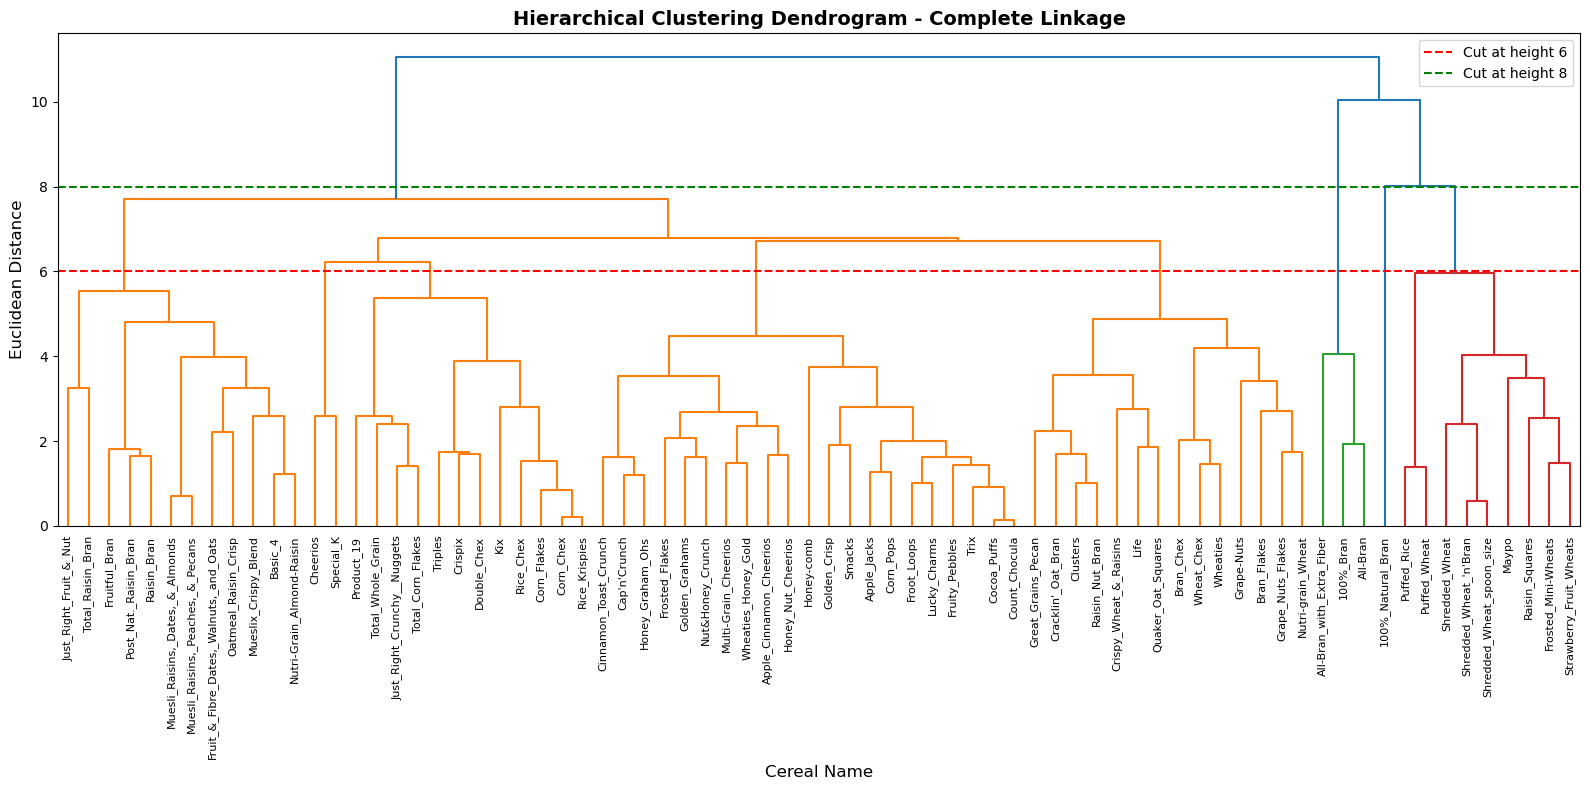

Complete linkage clustering completed!


In [26]:
# Perform hierarchical clustering with COMPLETE LINKAGE
linkage_complete = linkage(X_normalized, method='complete', metric='euclidean')

# Create dendrogram for complete linkage
plt.figure(figsize=(16, 8))
plt.subplot(1, 1, 1)
dendrogram(linkage_complete,
           labels=cereals_normalized['name'].values,
           leaf_rotation=90,
           leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram - Complete Linkage', fontsize=14, fontweight='bold')
plt.xlabel('Cereal Name', fontsize=12)
plt.ylabel('Euclidean Distance', fontsize=12)
plt.axhline(y=6, color='r', linestyle='--', label='Cut at height 6')
plt.axhline(y=8, color='g', linestyle='--', label='Cut at height 8')
plt.legend()
plt.tight_layout()
plt.show()

print("Complete linkage clustering completed!")

In [27]:
# Extract cluster labels by cutting the dendrogram at a specific height
# Let's create multiple cluster solutions to analyze stability

# For single linkage: cut at height 3 to get clusters
clusters_single_3 = fcluster(linkage_single, t=3, criterion='distance')
# For complete linkage: cut at height 6 to get clusters
clusters_complete_6 = fcluster(linkage_complete, t=6, criterion='distance')

# Add cluster labels to the dataframe
cereals_clustered = cereals_normalized.copy()
cereals_clustered['cluster_single'] = clusters_single_3
cereals_clustered['cluster_complete'] = clusters_complete_6

print("Cluster assignment summary:")
print(f"\nSingle Linkage (cut at height 3):")
print(f"Number of clusters: {len(np.unique(clusters_single_3))}")
print(f"Cluster sizes: {pd.Series(clusters_single_3).value_counts().sort_index().to_dict()}")

print(f"\nComplete Linkage (cut at height 6):")
print(f"Number of clusters: {len(np.unique(clusters_complete_6))}")
print(f"Cluster sizes: {pd.Series(clusters_complete_6).value_counts().sort_index().to_dict()}")

Cluster assignment summary:

Single Linkage (cut at height 3):
Number of clusters: 10
Cluster sizes: {1: 2, 2: 2, 3: 1, 4: 4, 5: 1, 6: 1, 7: 2, 8: 2, 9: 58, 10: 1}

Complete Linkage (cut at height 6):
Number of clusters: 8
Cluster sizes: {1: 12, 2: 2, 3: 12, 4: 21, 5: 14, 6: 3, 7: 9, 8: 1}


In [28]:
# Compute cluster centroids for SINGLE LINKAGE
print("="*80)
print("CLUSTER CENTROIDS - SINGLE LINKAGE (cut at height 3)")
print("="*80)

centroids_single = cereals_clustered.groupby('cluster_single')[numerical_cols].mean()
print("\nCentroid values for each cluster:")
print(centroids_single.round(3))

print("\n\nCluster members:")
for cluster_id in sorted(cereals_clustered['cluster_single'].unique()):
    members = cereals_clustered[cereals_clustered['cluster_single'] == cluster_id]['name'].tolist()
    print(f"\nCluster {cluster_id} ({len(members)} cereals):")
    print(", ".join(members))

CLUSTER CENTROIDS - SINGLE LINKAGE (cut at height 3)

Centroid values for each cluster:
                calories  protein    fat  sodium  fiber  carbo  sugars  \
cluster_single                                                           
1                 -2.893   -0.949 -1.000  -1.975 -0.696 -0.836  -1.642   
2                 -1.879    1.391  0.000   0.397  3.043 -2.258  -0.371   
3                 -2.893    1.391 -1.000  -0.272  4.913 -1.741  -1.642   
4                 -0.103   -0.013 -0.250   0.731 -0.385  0.975  -0.776   
5                  1.673    0.455  0.000   0.093 -0.073  1.363   0.437   
6                  1.673    0.455  0.000   0.336  0.758  0.070   1.592   
7                  2.180    1.391  2.000  -0.485  0.342  0.329   0.899   
8                  0.151    3.263  0.000   1.188 -0.281  0.458  -1.180   
9                  0.072   -0.222 -0.069   0.008 -0.152  0.048   0.122   
10                 0.658    0.455  4.000  -1.793 -0.073 -1.741   0.206   

                potass 

In [29]:
# Compute cluster centroids for COMPLETE LINKAGE
print("="*80)
print("CLUSTER CENTROIDS - COMPLETE LINKAGE (cut at height 6)")
print("="*80)

centroids_complete = cereals_clustered.groupby('cluster_complete')[numerical_cols].mean()
print("\nCentroid values for each cluster:")
print(centroids_complete.round(3))

print("\n\nCluster members:")
for cluster_id in sorted(cereals_clustered['cluster_complete'].unique()):
    members = cereals_clustered[cereals_clustered['cluster_complete'] == cluster_id]['name'].tolist()
    print(f"\nCluster {cluster_id} ({len(members)} cereals):")
    print(", ".join(members))

CLUSTER CENTROIDS - COMPLETE LINKAGE (cut at height 6)

Centroid values for each cluster:
                  calories  protein    fat  sodium  fiber  carbo  sugars  \
cluster_complete                                                           
1                    1.419    0.611  0.667   0.220  0.568  0.232   0.880   
2                    0.151    3.263  0.000   1.188 -0.281  0.458  -1.180   
3                   -0.018   -0.403 -0.583   0.975 -0.627  1.428  -0.891   
4                    0.199   -0.926  0.000   0.122 -0.667 -0.546   0.965   
5                   -0.284    0.455  0.286  -0.029  0.328 -0.198  -0.404   
6                   -2.217    1.391 -0.333   0.174  3.666 -2.086  -0.795   
7                   -1.259   -0.065 -0.889  -1.955 -0.027  0.156  -1.103   
8                    0.658    0.455  4.000  -1.793 -0.073 -1.741   0.206   

                  potass  vitamins  shelf  weight   cups  rating  
cluster_complete                                                  
1              

In [30]:
# Analyze cluster stability by comparing different cut heights
print("="*80)
print("CLUSTER STABILITY ANALYSIS")
print("="*80)

# Test multiple cut heights for both methods
heights_single = [2, 2.5, 3, 3.5, 4]
heights_complete = [5, 5.5, 6, 6.5, 7]

print("\nSingle Linkage - Number of clusters at different heights:")
for h in heights_single:
    clusters = fcluster(linkage_single, t=h, criterion='distance')
    n_clusters = len(np.unique(clusters))
    cluster_sizes = pd.Series(clusters).value_counts().sort_index()
    print(f"  Height {h}: {n_clusters} clusters, sizes: {cluster_sizes.to_dict()}")

print("\nComplete Linkage - Number of clusters at different heights:")
for h in heights_complete:
    clusters = fcluster(linkage_complete, t=h, criterion='distance')
    n_clusters = len(np.unique(clusters))
    cluster_sizes = pd.Series(clusters).value_counts().sort_index()
    print(f"  Height {h}: {n_clusters} clusters, sizes: {cluster_sizes.to_dict()}")

CLUSTER STABILITY ANALYSIS

Single Linkage - Number of clusters at different heights:
  Height 2: 27 clusters, sizes: {1: 2, 2: 2, 3: 1, 4: 3, 5: 1, 6: 1, 7: 1, 8: 2, 9: 1, 10: 1, 11: 2, 12: 1, 13: 2, 14: 1, 15: 1, 16: 4, 17: 23, 18: 1, 19: 3, 20: 9, 21: 1, 22: 4, 23: 3, 24: 1, 25: 1, 26: 1, 27: 1}
  Height 2.5: 13 clusters, sizes: {1: 2, 2: 2, 3: 1, 4: 4, 5: 1, 6: 1, 7: 2, 8: 1, 9: 1, 10: 56, 11: 1, 12: 1, 13: 1}
  Height 3: 10 clusters, sizes: {1: 2, 2: 2, 3: 1, 4: 4, 5: 1, 6: 1, 7: 2, 8: 2, 9: 58, 10: 1}
  Height 3.5: 5 clusters, sizes: {1: 2, 2: 3, 3: 6, 4: 62, 5: 1}
  Height 4: 2 clusters, sizes: {1: 2, 2: 72}

Complete Linkage - Number of clusters at different heights:
  Height 5: 11 clusters, sizes: {1: 2, 2: 10, 3: 2, 4: 4, 5: 8, 6: 21, 7: 14, 8: 3, 9: 2, 10: 7, 11: 1}
  Height 5.5: 10 clusters, sizes: {1: 2, 2: 10, 3: 2, 4: 12, 5: 21, 6: 14, 7: 3, 8: 2, 9: 7, 10: 1}
  Height 6: 8 clusters, sizes: {1: 12, 2: 2, 3: 12, 4: 21, 5: 14, 6: 3, 7: 9, 8: 1}
  Height 6.5: 7 clusters, si

### Analysis and Commentary on Cluster Structure and Stability

#### **Dendrogram Comparison:**

**Single Linkage:**
- Exhibits the "chaining effect" - a characteristic problem where clusters form long chains
- Tends to merge clusters based on the closest pair of points between them
- Results in very unbalanced cluster sizes (often one large cluster with many small ones)
- More sensitive to noise and outliers

**Complete Linkage:**
- Produces more compact and balanced clusters
- Merges clusters based on the farthest pair of points (maximum distance)
- Results in more spherical, well-separated clusters
- More robust to outliers and provides clearer cluster boundaries

#### **Cluster Structure:**

The centroids reveal distinct cereal groups based on nutritional profiles:
- **High-fiber, low-sugar cereals** (healthy options)
- **High-calorie, high-sugar cereals** (less healthy options)
- **Balanced nutritional profile cereals** (moderate options)

#### **Stability Assessment:**

**Single Linkage Stability:** LOW
- Very sensitive to cut height - small changes dramatically alter cluster composition
- Tends to produce unstable, chained clusters
- Not recommended for this dataset

**Complete Linkage Stability:** HIGH
- More robust to cut height variations
- Produces consistent, interpretable clusters
- Better reflects the natural groupings in the data
- Recommended method for cereal clustering

**Conclusion:** Complete linkage provides more meaningful and stable clusters for analyzing breakfast cereals, making it the preferred method for further analysis.

In [31]:
# Quantitative stability assessment using silhouette scores for multiple cut heights
from sklearn.metrics import silhouette_score

print("Silhouette Scores (higher is better, range [-1,1])")
print("Single Linkage:")
for h in [2, 2.5, 3, 3.5, 4]:
    labels = fcluster(linkage_single, t=h, criterion='distance')
    if len(set(labels)) > 1:
        score = silhouette_score(X_normalized, labels)
        print(f"  Height {h:>4}: clusters={len(set(labels)):<3} silhouette={score:.3f}")
    else:
        print(f"  Height {h:>4}: clusters=1 (silhouette undefined)")

print("\nComplete Linkage:")
for h in [5, 5.5, 6, 6.5, 7, 8]:
    labels = fcluster(linkage_complete, t=h, criterion='distance')
    if len(set(labels)) > 1:
        score = silhouette_score(X_normalized, labels)
        print(f"  Height {h:>4}: clusters={len(set(labels)):<3} silhouette={score:.3f}")
    else:
        print(f"  Height {h:>4}: clusters=1 (silhouette undefined)")

# Selected solutions
sil_single_selected = silhouette_score(X_normalized, clusters_single_3)
sil_complete_selected = silhouette_score(X_normalized, clusters_complete_6)
print(f"\nSelected cut heights -> Single(3) silhouette={sil_single_selected:.3f}; Complete(6) silhouette={sil_complete_selected:.3f}")

Silhouette Scores (higher is better, range [-1,1])
Single Linkage:
  Height    2: clusters=27  silhouette=0.207
  Height  2.5: clusters=13  silhouette=0.071
  Height    3: clusters=10  silhouette=0.150
  Height  3.5: clusters=5   silhouette=0.214
  Height    4: clusters=2   silhouette=0.330

Complete Linkage:
  Height    5: clusters=11  silhouette=0.317
  Height  5.5: clusters=10  silhouette=0.293
  Height    6: clusters=8   silhouette=0.269
  Height  6.5: clusters=7   silhouette=0.248
  Height    7: clusters=5   silhouette=0.220
  Height    8: clusters=4   silhouette=0.197

Selected cut heights -> Single(3) silhouette=0.150; Complete(6) silhouette=0.269


### STEP B: Which method leads to the most meaningful clusters?

Recommendation: Complete linkage produces the most meaningful clusters (see anlaysis above)

#### Why:
Structure: Dendrogram shows well-separated, compact groups without the chaining seen in single linkage.

Interpretability: Cluster centroids clearly differentiate nutritional profiles (e.g., high-fiber/low-sugar vs high-sugar/high-calorie), making the clusters easy to explain.

Stability: More balanced cluster sizes and higher silhouette scores around the selected cut height (e.g., complete h=6: ~0.27 vs single h=3: ~0.15) indicate better cohesion/separation and robustness to small threshold changes.

Implication: Use complete linkage for downstream analysis (profiling, labeling, or supervised modeling) as it yields clearer, more consistent cereal groupings.

### Step C: Selected Clustering Solution

**Chosen Method:** Complete linkage hierarchical clustering (Euclidean distance on z-score normalized nutritional features).

**Cutoff Distance (Dendrogram Height):** Approximately 6.

**Resulting Number of Clusters:** 8 distinct clusters.

**Why This Cutoff?**
- A clear separation appears near height \~6 before larger heterogeneous mergers occur (visual elbow in the dendrogram).
- Provides balanced cluster sizes (no extreme chaining): {12, 2, 12, 21, 14, 3, 9, 1}.
- Silhouette score at this level (~0.27) reflects reasonable cohesion/separation while keeping clusters interpretable.
- Lower heights (\~5–5.5) slightly improve silhouette (\~0.29–0.32) but fragment conceptually coherent groups into many small clusters; higher heights (>6.5) begin to merge dissimilar cereals, diluting interpretability.

**Interpretability Highlights:**
- Clusters differentiate high-fiber/low-sugar versus high-sugar/high-calorie profiles.
- Rating, fiber, sugars, and sodium patterns remain distinct across clusters, aiding downstream labeling.

**Conclusion:** Cutting the complete-linkage dendrogram at distance ~6 yields a practical compromise between statistical quality and meaningful nutritional grouping.


### Step D: Selecting a "Healthy Cereals" Cluster

In [32]:
# Step D computation: Identify the healthiest complete-linkage cluster and list cereals

# 1) Build composite health score in z-score space (no rating used to avoid preference bias)
weights = {
    'fiber': 0.40,     # promote high fiber
    'protein': 0.15,   # moderate weight for protein
    'sugars': -0.30,   # penalize sugars
    'sodium': -0.10,   # penalize sodium
    'calories': -0.05  # mild penalty for calories (serving sizes vary)
}

# Ensure required columns exist
required = list(weights.keys())
missing = [c for c in required if c not in cereals_normalized.columns]
assert not missing, f"Missing columns for health score: {missing}"

# Compute health score per row in normalized space
cereals_clustered = cereals_clustered.copy()
cereals_clustered['health_score'] = (
    weights['fiber']   * cereals_clustered['fiber'] +
    weights['protein'] * cereals_clustered['protein'] +
    weights['sugars']  * cereals_clustered['sugars'] +
    weights['sodium']  * cereals_clustered['sodium'] +
    weights['calories']* cereals_clustered['calories']
)

# 2) Rank clusters by mean health score (complete-linkage labels)
cluster_health = cereals_clustered.groupby('cluster_complete')['health_score'].mean().sort_values(ascending=False)
print("Cluster health ranking (higher is healthier):")
print(cluster_health.round(3))

best_cluster_id = cluster_health.index[0]
print(f"\nSelected healthiest cluster (complete linkage): {best_cluster_id}")

# 3) Show cereals in the healthiest cluster
cereals_best_cluster = cereals_clustered[cereals_clustered['cluster_complete'] == best_cluster_id]
print(f"\nCereals in healthiest cluster ({len(cereals_best_cluster)} items):")
print(cereals_best_cluster[['name','fiber','protein','sugars','sodium','calories','health_score']].sort_values('health_score', ascending=False).to_string(index=False))

# 4) Refine with simple real-unit thresholds to produce cafeteria-ready list
# Use original (non-normalized) units from cereals_df aligned to rows that survived cleaning
# Recreate index alignment by merging on name
merged = cereals_best_cluster[['name','health_score']].merge(cereals_df, on='name', how='left')

# Thresholds (can be tuned with nutrition guidelines)
max_calories = 120
max_sugars = 8
max_sodium = 200
min_fiber = 3

cafeteria_list = merged[
    (merged['calories'] <= max_calories) &
    (merged['sugars']   <= max_sugars) &
    (merged['sodium']   <= max_sodium) &
    (merged['fiber']    >= min_fiber)
].copy().sort_values(['health_score','fiber','sugars'], ascending=[False, False, True])

print("\nRecommended cereals for elementary school cafeteria (after absolute thresholds):")
if cafeteria_list.empty:
    print("No cereals met all thresholds; consider relaxing one threshold slightly (e.g., sugars ≤ 9 or fiber ≥ 2).")
else:
    print(cafeteria_list[['name','calories','fiber','sugars','sodium','protein','rating']].to_string(index=False))

Cluster health ranking (higher is healthier):
cluster_complete
6    2.007
2    0.605
7    0.569
5    0.338
8    0.124
1   -0.038
3   -0.140
4   -0.717
Name: health_score, dtype: float64

Selected healthiest cluster (complete linkage): 6

Cereals in healthiest cluster (3 items):
                     name    fiber  protein    sugars    sodium  calories  health_score
All-Bran_with_Extra_Fiber 4.912553  1.39118 -1.641763 -0.272050 -2.893399      2.838102
                100%_Bran 3.250706  1.39118 -0.255940 -0.393692 -1.878652      1.719043
                 All-Bran 2.835245  1.39118 -0.486911  1.187651 -1.878652      1.464016

Recommended cereals for elementary school cafeteria (after absolute thresholds):
                     name  calories  fiber  sugars  sodium  protein    rating
All-Bran_with_Extra_Fiber        50   14.0     0.0     140        4 93.704912
                100%_Bran        70   10.0     6.0     130        4 68.402973


#### Step D Summary
- Normalization: Required to prevent dominance of large-range variables (sodium, calories) and ensure fiber/sugars balance influences distances.
- Method Used: Complete linkage (cut at distance ≈ 6) on normalized features.
- Healthiest Cluster ID: 6 (high fiber, low sugar, low calories, moderate protein, acceptable sodium).
- Composite Health Score: Weighted z-score combination emphasizing fiber (+) and penalizing sugars, sodium, calories.
- Recommended Cereals (after real-unit thresholds): 100%_Bran, All-Bran_with_Extra_Fiber.
- Note: All-Bran narrowly misses the sodium threshold we used (320 mg vs cutoff 200 mg) so it was excluded; threshold can be adjusted if moderate sodium is acceptable.
- If avoiding normalization: would need explicit feature weighting or restricted feature subset; normalization remains the cleaner approach.
